In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('tested.csv')

In [5]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
dc=df.drop('Cabin',axis=1)

In [8]:
dc['Age']=df['Age'].fillna(dc['Age'].mean())

<AxesSubplot:>

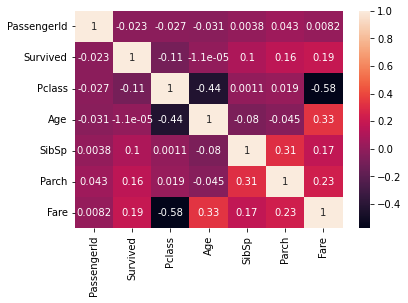

In [12]:
sns.heatmap(dc.corr(),annot=True)

C:\Users\Saleem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

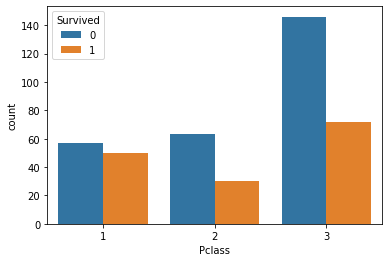

In [20]:
sns.countplot('Pclass',hue= 'Survived',data=dc)

C:\Users\Saleem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

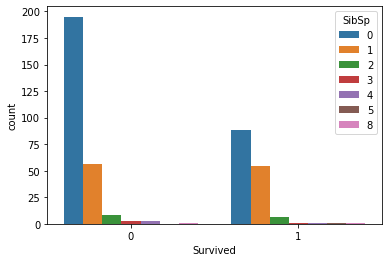

In [22]:
sns.countplot('Survived', data=dc, hue='SibSp')

(array([ 16.,  16.,  71., 183.,  43.,  37.,  25.,  17.,   9.,   1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

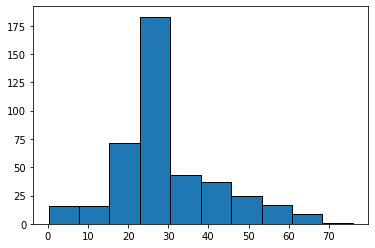

In [28]:
plt.hist(dc.Age,edgecolor='black')

C:\Users\Saleem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

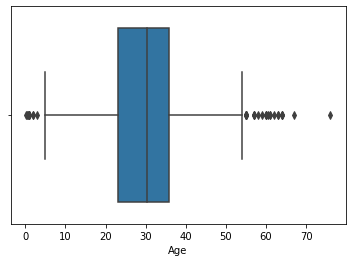

In [29]:
sns.boxplot('Age',data=dc)

C:\Users\Saleem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


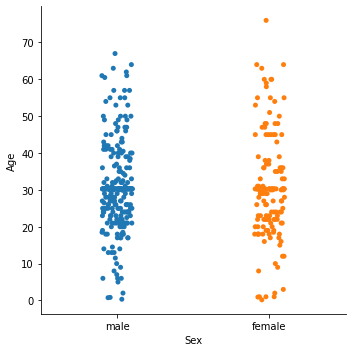

In [37]:
sns.catplot('Sex','Age',data=dc)

C:\Users\Saleem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


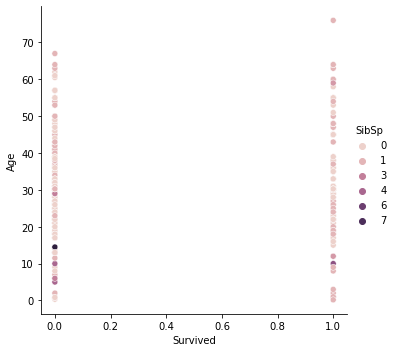

In [42]:
sns.relplot('Survived','Age',data=dc,hue='SibSp')

C:\Users\Saleem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


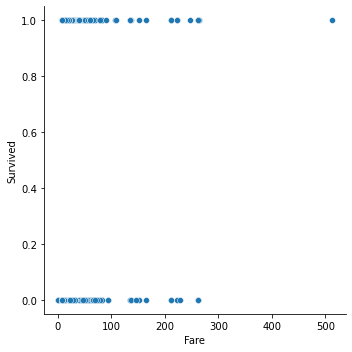

In [50]:
sns.relplot('Fare','Survived',data=dc)

C:\Users\Saleem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

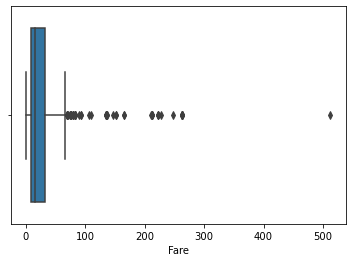

In [45]:
sns.boxplot('Fare',data=dc)

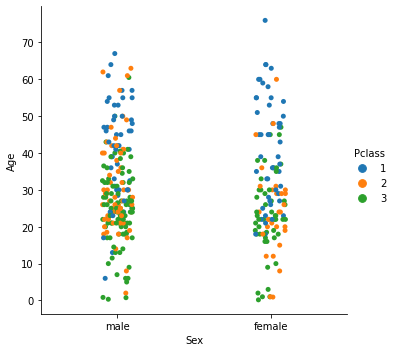

In [56]:
sns.catplot('Sex','Age',data=df,hue='Pclass')

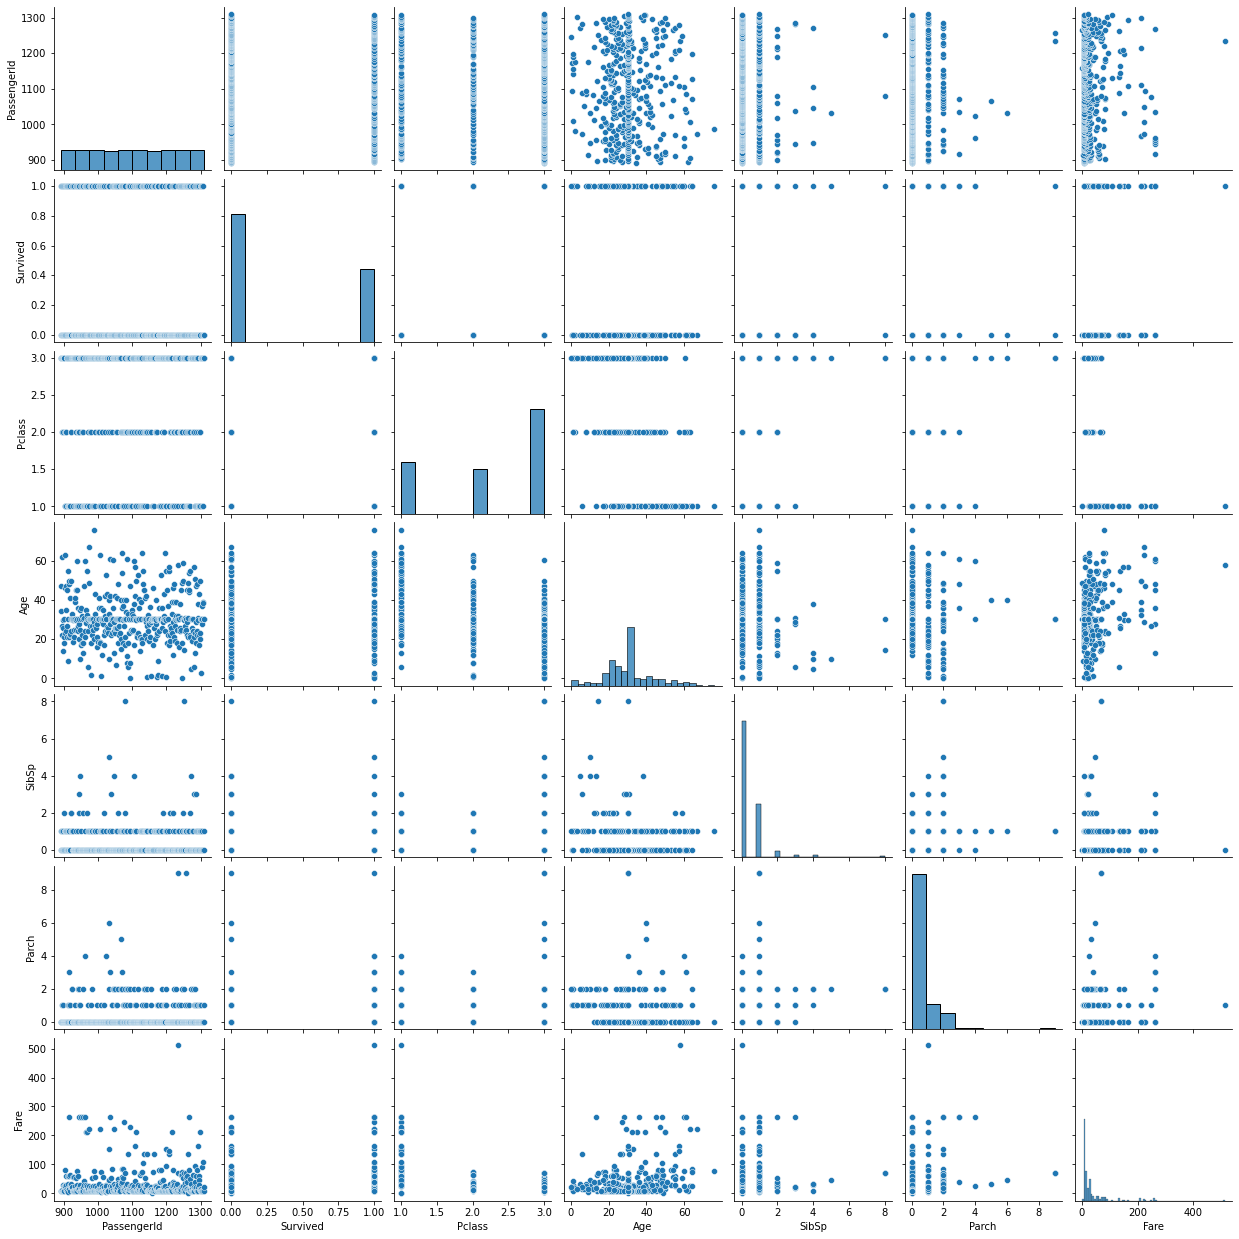

In [57]:
sns.pairplot(dc)

C:\Users\Saleem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


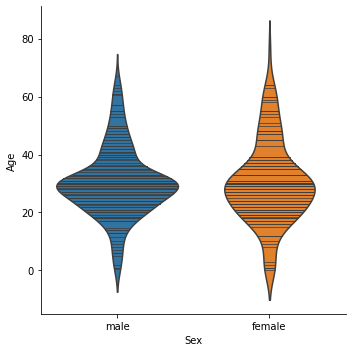

In [60]:
sns.catplot('Sex','Age',data=dc,kind='violin',inner='stick')

In [61]:
dc.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [62]:
dc['Fare']=dc['Fare'].fillna(dc['Fare'].mean())

In [63]:
hd=dc.drop(['PassengerId','Name','Ticket'],axis=1)

In [64]:
hd.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q


In [65]:
hd['Sex']=hd['Sex'].replace('male',1)

In [66]:
hd['Sex']=hd['Sex'].replace('female',2)

In [68]:
hd.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,Q
1,1,3,2,47.0,1,0,7.0000,S
2,0,2,1,62.0,0,0,9.6875,Q
3,0,3,1,27.0,0,0,8.6625,S
4,1,3,2,22.0,1,1,12.2875,S


In [74]:
emb=pd.get_dummies(hd.Embarked,drop_first=True)

In [75]:
dv=hd.drop('Embarked',axis=1)

In [76]:
df=pd.concat([dv,emb],axis=1)

In [83]:
x=df.drop('Survived',axis=1)

In [84]:
y=df['Survived']

In [82]:
from sklearn.model_selection import train_test_split

In [87]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.3)

In [78]:
from sklearn.linear_model import LogisticRegression

In [80]:
reg=LogisticRegression()

In [88]:
reg.fit(x_train,y_train)

C:\Users\Saleem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
reg.predict([[2,1,35,1,2,8,1,0]])

array([0], dtype=int64)

In [91]:
reg.score(x_train,y_train)

1.0

In [92]:
from sklearn import tree

In [93]:
reg=tree.DecisionTreeClassifier()

In [94]:
reg.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
reg.predict([[2,1,35,1,2,8,1,0]])

array([0], dtype=int64)

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
reg=RandomForestClassifier(n_estimators=10)

In [99]:
reg.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [101]:
reg.predict([[2,1,35,1,2,8,1,0]])

array([0], dtype=int64)